In [1]:
import matplotlib.colors as mcolors
import matplotlib.animation as ma
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from itertools import product
import pandas as pd
import numpy as np
import numba as nb
import imageio
import os
import shutil

randomSeed = 100

%matplotlib inline
%config InlineBackend.figure_format = "retina"

new_cmap = mcolors.LinearSegmentedColormap.from_list(
    "new", plt.cm.jet(np.linspace(0, 1, 256)) * 0.85, N=256
)

@nb.njit
def colors_idx(phaseTheta):
    return np.floor(256 - phaseTheta / (2 * np.pi) * 256).astype(np.int32)

import seaborn as sns

sns.set_theme(
    style="ticks", 
    font_scale=1.1, rc={
    'figure.figsize': (6, 5),
    'axes.facecolor': 'white',
    'figure.facecolor': 'white',
    'grid.color': '#dddddd',
    'grid.linewidth': 0.5,
    "lines.linewidth": 1.5,
    'text.color': '#000000',
    'figure.titleweight': "bold",
    'xtick.color': '#000000',
    'ytick.color': '#000000'
})

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['animation.ffmpeg_path'] = "/opt/conda/bin/ffmpeg"

from main import *
from multiprocessing import Pool
import pandas as pd

In [3]:
model = DisWgtCouple(0.015, 0.2, typeA="distanceWgt", tqdm=True, savePath="data", overWrite=True)

In [4]:
model.run(60000)

  0%|          | 0/60000 [00:00<?, ?it/s]

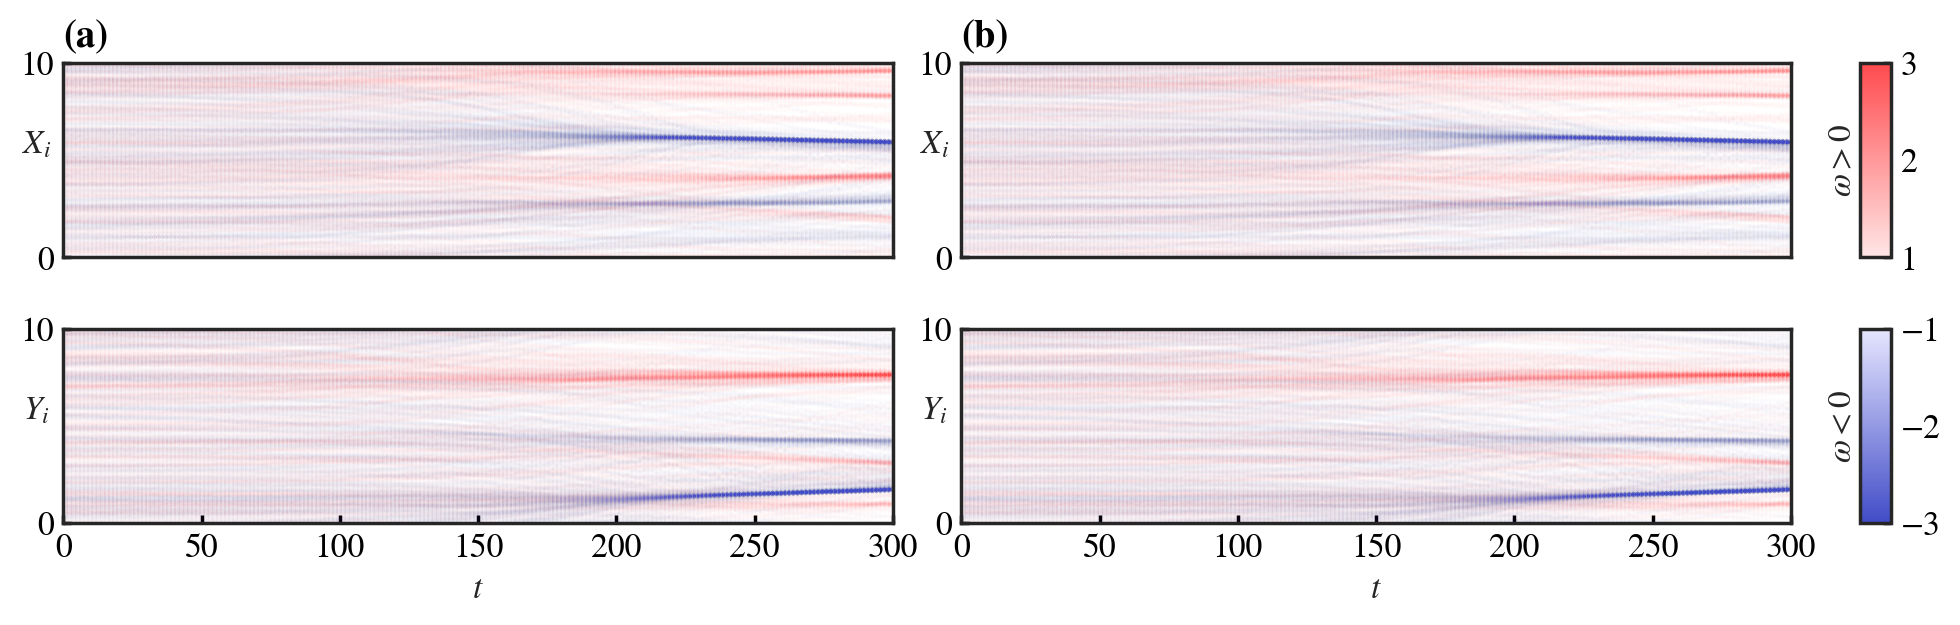

In [4]:
_ = plt.figure(figsize=(10, 5 / 3 * 2))

fontSize = 12

model = DisWgtCouple(0.015, 0.2, typeA="distanceWgt", tqdm=True, savePath="data", overWrite=True)
colWide = 18
ax1Row1 = plt.subplot2grid((2, colWide + 1), (0, 0), colspan=colWide // 2)
ax1Row2 = plt.subplot2grid((2, colWide + 1), (1, 0), colspan=colWide // 2)
ax1Row1.tick_params(direction='in', length=3)
ax1Row2.tick_params(direction='in', length=3)
sa = StateAnalysis(model, classDistance=1, lookIndex=-1, showTqdm=False)
cp1, _ = sa.tv_center_position(step=30)
cp1[:, 0] = cp1[:, 0]
color = ["#FF4B4E"] * 500 + ["#414CC7"] * 500
colors = np.array(color * (cp1.shape[0] // 1000))

s = 0.5
alpha = 0.01
step = 2
dt = 0.01
labelpad = -6

np.random.seed(10)
omegaTheta = np.random.uniform(1, 3, size=500)

idx = np.arange(cp1.shape[0], step=step)
ax1Row1.scatter(cp1[idx, 0] * dt * 5, cp1[idx, 1], s=s, alpha=alpha, c=colors[idx])  # 
ax1Row1.set_ylim(0, 10)
ax1Row1.set_xlim(0, 300)
ax1Row1.set_xticks([])
ax1Row1.set_ylabel(f"$X_i$", rotation=0, fontsize=fontSize, labelpad=labelpad)
ax1Row1.set_title("(a)", loc="left", fontweight='bold', fontsize=fontSize + 2)
ax1Row1.set_yticks([0, 10])
ax1Row2.scatter(cp1[idx, 0] * dt * 5, cp1[idx, 2], s=s, alpha=alpha, c=colors[idx])  # 
ax1Row2.set_ylim(0, 10)
ax1Row2.set_xlim(0, 300)
ax1Row2.set_xlabel(f"$t$", fontsize=fontSize)
ax1Row2.set_ylabel(f"$Y_i$", rotation=0, fontsize=fontSize, labelpad=labelpad)
ax1Row2.set_yticks([0, 10])

model = DisWgtCouple(0.015, 0.2, typeA="distanceWgt", tqdm=True, savePath="data", overWrite=True)
ax2Row1 = plt.subplot2grid((2, colWide + 1), (0, colWide // 2), colspan=colWide // 2)
ax2Row2 = plt.subplot2grid((2, colWide + 1), (1, colWide // 2), colspan=colWide // 2)
ax2Row1.tick_params(direction='in', length=3)
ax2Row2.tick_params(direction='in', length=3)
sa = StateAnalysis(model, classDistance=1, lookIndex=-1, showTqdm=False)
cp1, _ = sa.tv_center_position(step=30)

color2 = "#77A4DE"
cp1[:, 0] = cp1[:, 0]

idx = np.arange(cp1.shape[0], step=step)
ax2Row1.scatter(cp1[idx, 0] * dt * 5, cp1[idx, 1], s=s, alpha=alpha, c=colors[idx])  #
ax2Row1.set_ylim(0, 10)
ax2Row1.set_xlim(0, 300)
ax2Row1.set_xticks([])
ax2Row1.set_ylabel(f"$X_i$", rotation=0, fontsize=fontSize, labelpad=labelpad)
ax2Row1.set_title("(b)", loc="left", fontweight='bold', fontsize=fontSize + 2)
ax2Row1.set_yticks([0, 10])
sca = ax2Row2.scatter(cp1[idx, 0] * dt * 5, cp1[idx, 2], s=s, alpha=alpha, c=colors[idx])  #
ax2Row2.set_ylim(0, 10)
ax2Row2.set_xlim(0, 300)
ax2Row2.set_xlabel(f"$t$", fontsize=fontSize)
ax2Row2.set_ylabel(f"$Y_i$", rotation=0, fontsize=fontSize, labelpad=labelpad)
ax2Row2.set_yticks([0, 10])

colors = ["#FFE6E6", "#FF4B4E"]
labelpad2 = -32
rcmap = mcolors.LinearSegmentedColormap.from_list("my_colormap", colors)
sca = ax2Row1.scatter(-np.arange(omegaTheta.size), -np.ones_like(omegaTheta), 
           c=np.linspace(1, 3, len(omegaTheta)), cmap=rcmap)
colorbarAx1 = plt.subplot2grid((2, colWide + 1), (0, colWide))
cbar = plt.colorbar(sca, cax=colorbarAx1)
cbar.set_label(r"$\omega>0$", fontsize=12, labelpad=labelpad2)
cbar.ax.tick_params(direction='in', length=3)

colors = ["#414CC7", "#E6E6FF"]
rcmap = mcolors.LinearSegmentedColormap.from_list("my_colormap", colors)
sca = ax2Row2.scatter(-np.arange(omegaTheta.size), -np.ones_like(omegaTheta), 
           c=-np.linspace(1, 3, len(omegaTheta)), cmap=rcmap)
colorbarAx2 = plt.subplot2grid((2, colWide + 1), (1, colWide))
cbar = plt.colorbar(sca, cax=colorbarAx2)
cbar.set_label(r"$\omega<0$", fontsize=12, labelpad=labelpad2 - 8)
cbar.ax.tick_params(direction='in', length=3)

plt.tight_layout(w_pad=0)